<a href="https://colab.research.google.com/github/archangel2006/Machine-Learning-Models/blob/main/Mushroom%20Classifier%20(KNN%2C%20RandomForest%2C%20LogisticRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍄 Mushroom Classifier: Edible or Poisonous?


- K-Nearest Neighbors (KNN)
- Logistic Regression
- Random Forest Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/mushrooms.csv')

In [5]:
df.shape

(8124, 23)

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [14]:
# Unique values per feature

for col in df.columns:
    print(f"{col}: {df[col].unique()}")

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [15]:
# Class distribution

df['class'].value_counts()

,count
class,
e,4208
p,3916


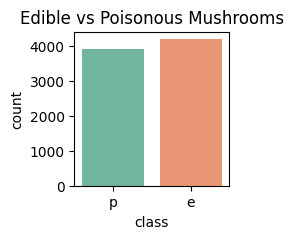

In [24]:
# Visualize class distribution

plt.figure(figsize=(2,2))
sns.countplot(data=df, x='class',hue='class', palette='Set2')
plt.title('Edible vs Poisonous Mushrooms')
plt.show()

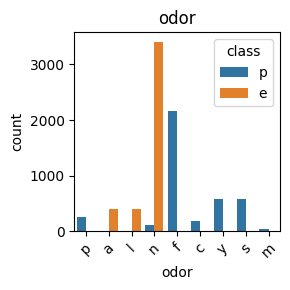

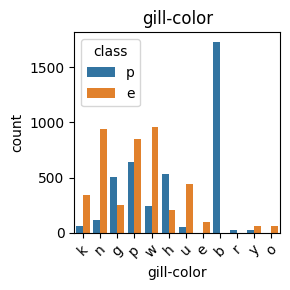

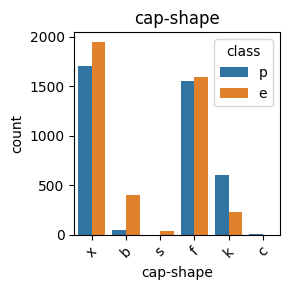

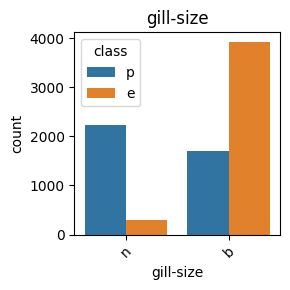

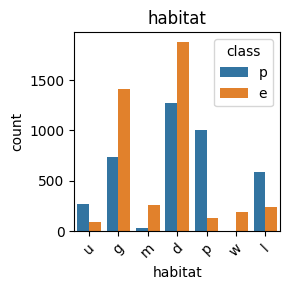

In [26]:
cols_to_plot = ['odor', 'gill-color', 'cap-shape', 'gill-size', 'habitat']
for col in cols_to_plot:
    plt.figure(figsize=(3,3))
    sns.countplot(data=df, x=col, hue='class')
    plt.title(f"{col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Preprocessing

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
# Encode all categorical features
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split - Traning & Test Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Split data

x = df.drop('class', axis=1)
y = df['class']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [35]:
# Scale features for KNN

from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Training

In [43]:
# Train models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=2000)
rf = RandomForestClassifier(random_state=42)

In [48]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [44]:
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [45]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

models = {'KNN': knn, 'Logistic Regression': logreg, 'Random Forest': rf}
x_tests = {'KNN': x_test_scaled, 'Logistic Regression': x_test, 'Random Forest': x_test}

In [49]:
for name, model in models.items():
    y_pred = model.predict(x_tests[name])
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()


--- KNN ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[843   0]
 [  0 782]]

--- Logistic Regression ---
Accuracy: 0.9476923076923077
Precision: 0.9439490445859873
Recall: 0.9475703324808185
F1-Score: 0.9457562220804084
Confusion Matrix:
 [[799  44]
 [ 41 741]]

--- Random Forest ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
 [[843   0]
 [  0 782]]



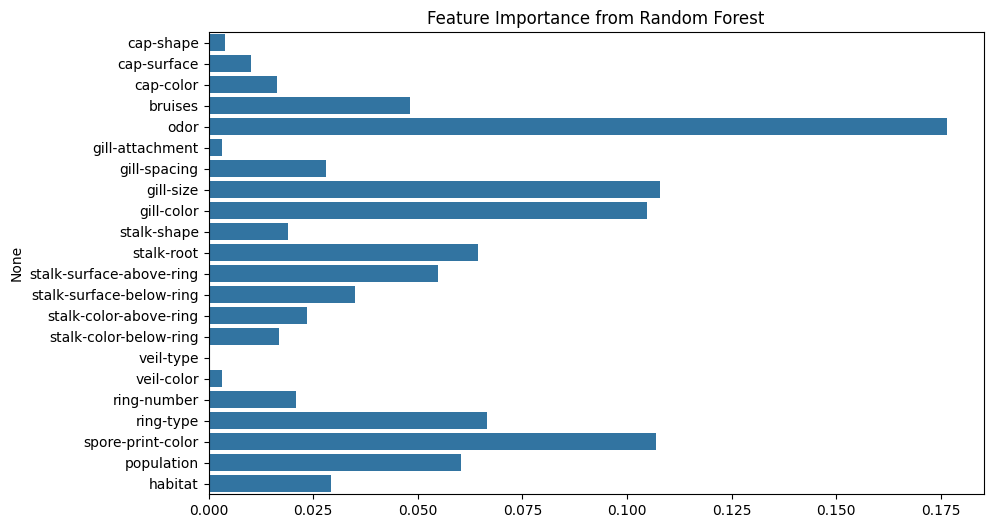

In [51]:
# Feature Importance

importances = rf.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()


# Comparision

| Metric               | **KNN**                 | **Logistic Regression**   | **Random Forest**       |
| -------------------- | ----------------------- | ------------------------- | ----------------------- |
| **Accuracy**         | 1.000                   | 0.9477                    | 1.000                   |
| **Precision**        | 1.000                   | 0.9439                    | 1.000                   |
| **Recall**           | 1.000                   | 0.9476                    | 1.000                   |
| **F1-Score**         | 1.000                   | 0.9458                    | 1.000                   |


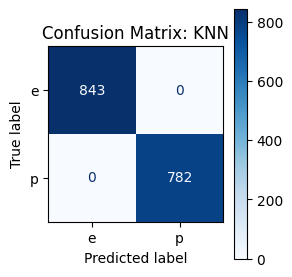

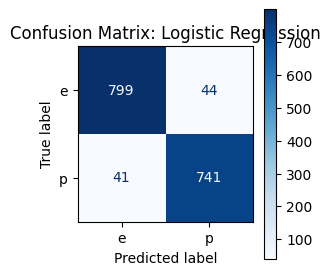

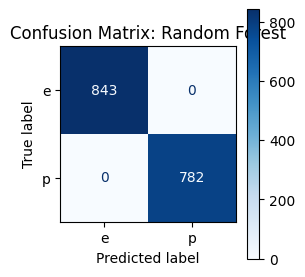

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(x_tests[name])
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(3, ))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['class'].classes_)
    disp.plot(cmap='Blues',ax=ax)
    ax.set_title(f'Confusion Matrix: {name}')
    plt.tight_layout()
    plt.show()

# Conclusion:
- K-Nearest Neighbors (KNN) and Random Forest both achieved perfect scores (1.0) across all metrics, with zero misclassifications in their confusion matrices. This means they correctly predicted all edible and poisonous mushrooms in the test set.

- **KNN** benefits from the clear separation in encoded feature space after scaling.

- **Random Forest** handles categorical features very well and automatically selects important ones like odor, reducing overfitting risk.

- **Logistic Regression** still performed very well (~94.8% accuracy), but it's a linear model, so it may struggle to capture complex feature interactions that tree-based models or KNN naturally handle better.

# Sample Prediction

In [60]:
# Sample mushroom input
sample = {
    'cap-shape': 'x',
    'cap-surface': 's',
    'cap-color': 'n',
    'bruises': 't',
    'odor': 'p',
    'gill-attachment': 'f',
    'gill-spacing': 'c',
    'gill-size': 'n',
    'gill-color': 'k',
    'stalk-shape': 'e',
    'stalk-root': 'b',
    'stalk-surface-above-ring': 's',
    'stalk-surface-below-ring': 's',
    'stalk-color-above-ring': 'w',
    'stalk-color-below-ring': 'w',
    'veil-type': 'p',
    'veil-color': 'w',
    'ring-number': 'o',
    'ring-type': 'p',
    'spore-print-color': 'k',
    'population': 's',
    'habitat': 'u'
}

In [61]:
# Encode the input using stored label encoders

encoded_sample = []
for col in x.columns:
    encoded_val = label_encoders[col].transform([sample[col]])[0]
    encoded_sample.append(encoded_val)

In [65]:
# Predict
sample_array = np.array(encoded_sample).reshape(1, -1)
sample_df = pd.DataFrame([encoded_sample], columns=x.columns)
sample_scaled = scaler.transform(sample_df)

In [66]:
prediction = rf.predict(sample_scaled)  #
predicted_class = label_encoders['class'].inverse_transform(prediction)[0]

print("Predicted Class:", predicted_class)

Predicted Class: p


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
prediction = logreg.predict(sample_scaled)  # Replace with rf, knn, or logreg
predicted_class = label_encoders['class'].inverse_transform(prediction)[0]

print("Predicted Class:", predicted_class)

Predicted Class: p


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [68]:
prediction = knn.predict(sample_scaled)  # Replace with rf, knn, or logreg
predicted_class = label_encoders['class'].inverse_transform(prediction)[0]

print("Predicted Class:", predicted_class)

Predicted Class: p
